In [1]:
import os
import scipy.io as sio
import numpy as np
from utils.util_plot import save_and_show_flow_gif, save_and_show_gif
from IPython.display import Image, HTML

In [2]:
test_data_path = './data/test_cine/0001'
result_data_path = './saved/result_test_cine/0001'
figure_path = './saved/figure_test_cine/0001'
os.makedirs(figure_path, exist_ok=True)

input_cine_gifname = 'input_cine.gif'
output_disp_gifname = 'output_displacement.gif'
GT_DENSE_disp_gifname = 'GT_DENSE_displacement.gif'
original_cine_gifname = 'MRI_cine_original_image.gif'

### Network input

In [3]:
# Network input dimension: [1, 1, dx, dy, dt]
input_image = np.squeeze(sio.loadmat(os.path.join(test_data_path, 'input.mat'))['input'])
save_and_show_gif(input_image, path=figure_path, filename=input_cine_gifname)

### Run model on testing dataset

In [4]:
!bash ./test_cine.sh

Loading checkpoint: saved/models/StrainNet/0422_000912/model_best.pth ...
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  1.25it/s]


### Estimated displacement

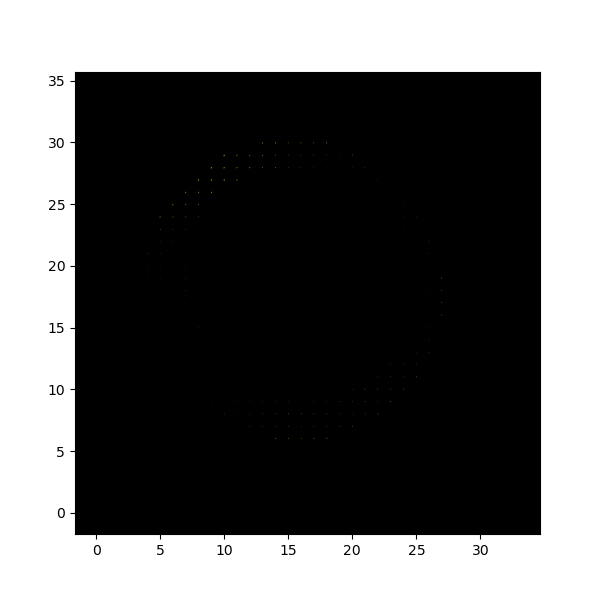

In [5]:
# Network output dimension: [1, 2, dx, dy, dt]
displacement = sio.loadmat(os.path.join(result_data_path, 'outputs.mat'))['outputs']
image = sio.loadmat(os.path.join(result_data_path, 'inputs.mat'))['inputs']
mask = image[0, 0, :, :, 0]
save_and_show_flow_gif(displacement, mask, path=figure_path, filename=output_disp_gifname, is_show=False)

### Original cine images, Estimated displacement by StrainNet, and Reference DENSE displacement

In [6]:
gif_list = [original_cine_gifname,output_disp_gifname, GT_DENSE_disp_gifname]
gif_names = ['Original cine images', 'StrainNet-estimated displacement', 'Reference DENSE displacement']

---------------Original cine images---------------


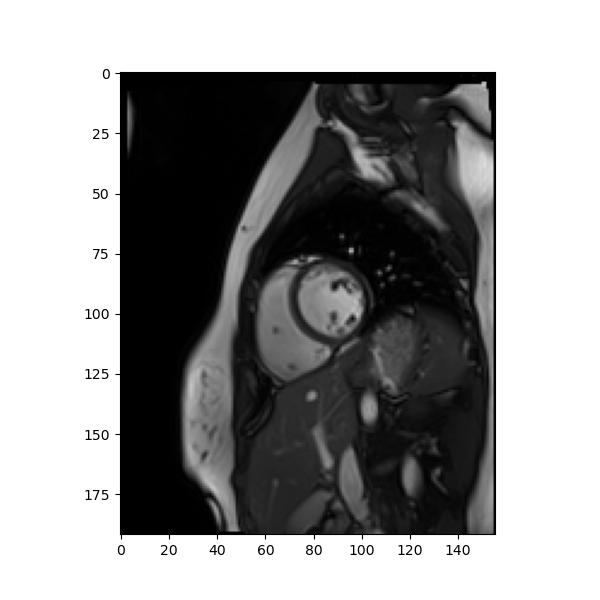

---------StrainNet-estimated displacement---------


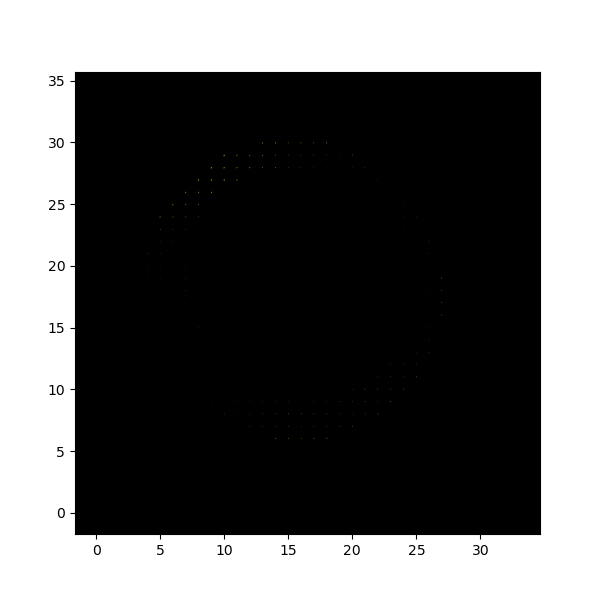

-----------Reference DENSE displacement-----------


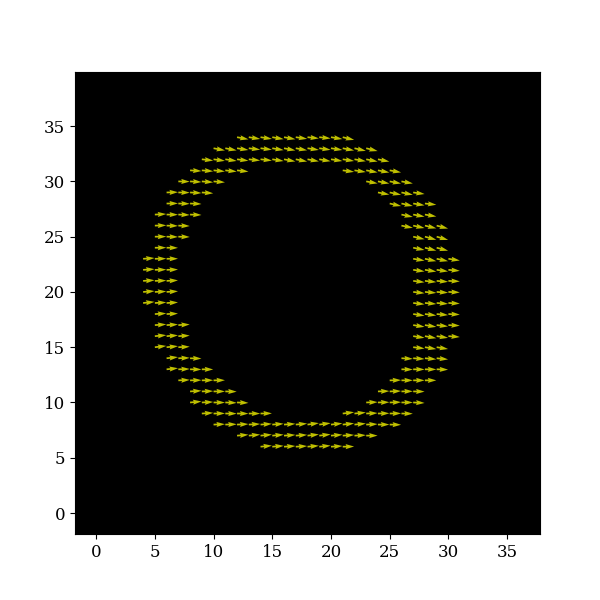

In [7]:
for gif, gif_name in zip(gif_list, gif_names):
    print(gif_name.center(50, '-'))
    with open(os.path.join(figure_path, gif), 'rb') as f:
        display(Image(data=f.read(), width=400, height=400, format='png'))